In [14]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import collections
from skimage.draw import circle, line
from skimage.measure import regionprops
import tqdm
import matplotlib.image as mpimg
import shutil
from os import listdir
import random

In [15]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

In [16]:
path = '/mnt/holomonitor-pvc/finalprojecttest/'

time = []


n = list(range(1,5))

li = ['B3','D5','D6','F10','B5','C11','F7','B6','B4','E9','C7','F8','D2','G9','C2','E6','D3','B9','C4','D9','G2','C10','F3','G11']


time_points = list(map(str, range(0,31)))

new_time = []
for i in time_points:
    r = ' ' + i + '.'
    new_time.append(r)


for dirname, dirnames,filenames in os.walk(path):
    
    for filename in sorted(filenames, key = natural_keys):
        
        for index in n:
            for le in li:
                for t in new_time:
                    if '{}-{}'.format(le,index) in filename and '{}tiff'.format(t) in filename: #PAY ATTENTION ID THE IMAGE IS A TIFF OR PNG IMAGE #########
                        time.append(filename)

        

In [17]:
len(time)

2880

In [18]:
wells = ['B3-2','D5-3','D6-4','F10-4','B5-1','C11-2','F7-2','B6-3','B4-1','E9-4','C7-2','F8-2','D2-4','G9-3','C2-1','E6-2','D3-1','B9-4','C4-3','D9-2','G2-3','C10-4','F3-2','G11-1']

test = []

for i in time:
    for w in wells:
        if w in i:
            test.append(i)
            



In [19]:
train = [i for i in time if i not in test]

In [20]:
len(test), len(train)

(720, 2160)

In [8]:
image_list = []

for ix , i in enumerate(train):
    for filename in glob.glob(path + i): 
        im=cv2.imread(filename)

        image_list.append(im)

IndexError: list index out of range

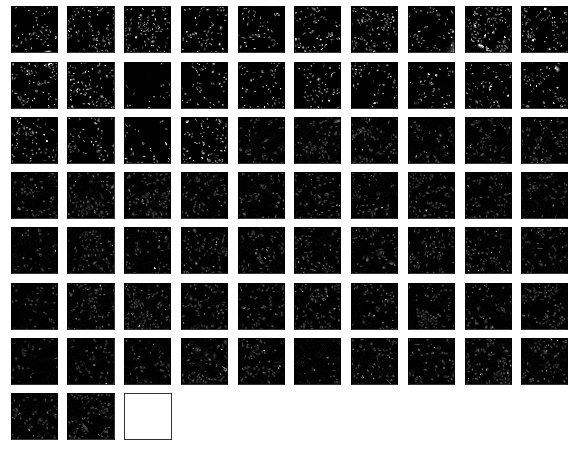

In [9]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[y_orig_1[i]])
plt.show()

## Training

In [21]:
new_path = '/home/jovyan/DATA_MASTER_PROJECT/FINAL_Data/3_classes_t_30_Medium/train_full_size'
os.mkdir(new_path)

for i in train:
    shutil.copy(path+i, new_path+ '/' +i)

## Test

In [22]:
new_path = '/home/jovyan/DATA_MASTER_PROJECT/FINAL_Data/3_classes_t_30_Medium/test_full_size'
os.mkdir(new_path)

for i in test:
    shutil.copy(path+i, new_path+ '/' +i)